# LockBit Dump

On May 7, 2025, the LockBit admin panel was hacked by an anonymous actor who replaced their TOR website with the text ‘Don’t do crime CRIME IS BAD xoxo from Prague’ and shared a SQL dump of their admin panel database in an archived file ‘paneldb_dump.zip’

## Preparativos

Analizo las tablas con XAMPP por ser lo más práctico, exporto las tablas que me interesan:
1. users
2. 

## Users

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [16]:
users = pd.read_csv("users.csv") #ojo rutaaaaa
users.head()

,id,parentid,login,password,is_admin,level,session_id,linesxi_on,reg_date,last_online,...,keep_messages_unread,toxid,toxdata,ips,permissions,paranoid_mode,created_at,updated_at,tag,invite_id
0,1,0,admin,gyCuCzeMxHpT7a5fSYRDY5DxzefrdD5g5ktiibyE,1,4,t2km45gl7n6njiapm846jsr0af23ps2l7nf618v0,1,1605453973,1745930762,...,0,A1A6D2ECC8DB18DA0D5F04C5ED01A565B5A46E4012FAE6...,NaN,NaN,"[""chats"",""write_chat"",""news"",""faq"",""lb_green"",...",1,31/01/2022 22:20,29/04/2025 12:46,NaN,0
1,2,0,matrix777,81jlXQFHOdGiY8C3peSZxFUxtUKjbIhh1936k6xo,0,1,1jjhf6np9a0mk680n1gik5k99shbgjml0nfbs6et,1,1605453973,1745926182,...,0,A1A6D2ECC8DB18DA0D5F04C5ED01A565B5A46E4012FAE6...,NaN,NaN,"[""chats"",""write_chat"",""news"",""faq"",""lb_green"",...",1,31/01/2022 22:20,29/04/2025 11:29,NaN,0
2,3,0,fedor,rYYBqlru7Wdp3VOAW9PJ,0,1,tuae602lmf5r4jqkm04glksfcu0o320i7iuuc8n8,0,1734552249,1734567002,...,0,EMPTY,NaN,NaN,"[""chats"",""write_chat"",""news"",""faq"",""lb_green"",...",0,18/12/2024 20:04,29/04/2025 11:44,newbie,1
3,4,0,KeaynBaker,R89HJ8RsFGwptAuku7Gg,0,1,e90e4b7tdc9gbdtbso3fqogtq2codbipt8s468kl,0,1734552576,1734571225,...,0,EMPTY,NaN,NaN,"[""chats"",""write_chat"",""news"",""faq"",""lb_green"",...",0,18/12/2024 20:09,29/04/2025 11:44,newbie,2
4,5,0,five,hP2txLy6Tb4CD6NZatMTZFe,0,1,l3vj3k82g4qlpmr35kr8pfv5k7fafj3ahko5j2si,0,1734552584,1734706625,...,0,EMPTY,NaN,NaN,"[""chats"",""write_chat"",""news"",""faq"",""lb_green"",...",0,18/12/2024 20:09,29/04/2025 11:44,newbie,3


In [33]:
#conversión UNIX a timestamp o NaT
users["reg_date"] = pd.to_datetime(users["reg_date"], unit="s", errors="coerce")
users["last_online"] = pd.to_datetime(users["last_online"], unit="s", errors="coerce")
users[["reg_date", "last_online"]].dtypes

reg_date       datetime64[ns]
last_online    datetime64[ns]
dtype: object

In [30]:
users[["reg_date", "last_online"]].agg(["min", "max"])

,reg_date,last_online
min,2020-11-15 15:26:13,2024-12-19 00:10:02
max,2025-04-22 10:28:12,2025-04-29 13:23:24


In [32]:
users.loc[
    users["last_online"] == pd.Timestamp("1970-01-01 00:00:00"),
    "last_online"
] = pd.NaT
users["last_online"].min()

Timestamp('2024-12-19 00:10:02')

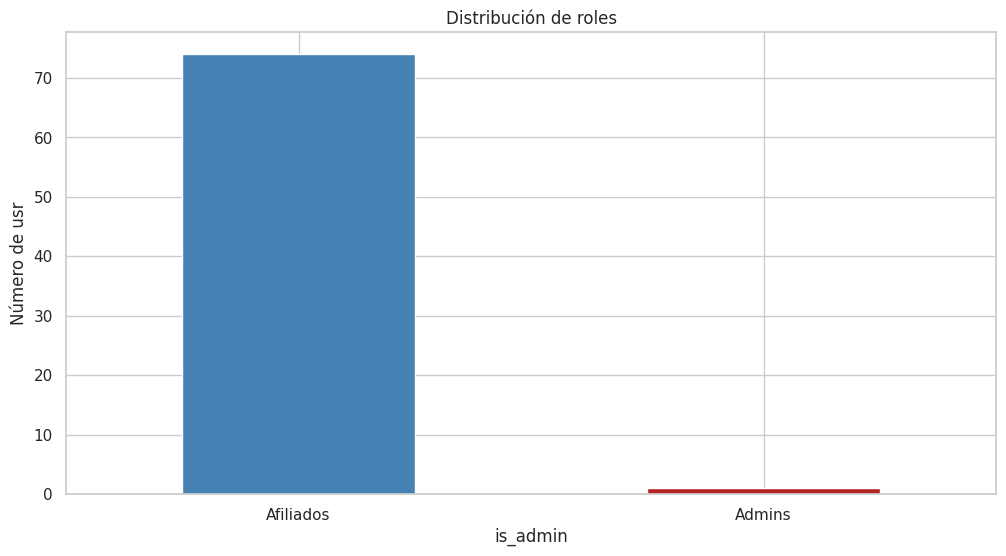

In [50]:
#Distribución de roles (admin vs afiliados)
colors = ["steelblue", "firebrick"]

role_counts.plot(
    kind="bar",
    color=colors
)
plt.title("Distribución de roles")
plt.xticks([0, 1], ["Afiliados", "Admins"], rotation=0)
plt.ylabel("Número de usr")
plt.show()


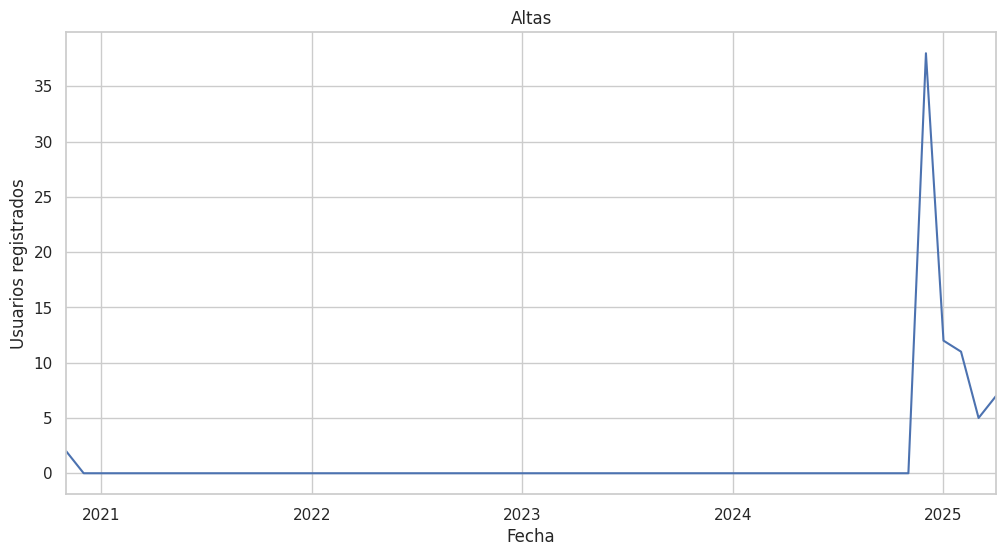

In [55]:
#ALTAS DE USER
users.set_index("reg_date").resample("ME")["id"].count().plot()
plt.title("Altas")
plt.xlabel("Fecha")
plt.ylabel("Usuarios registrados")
plt.show()


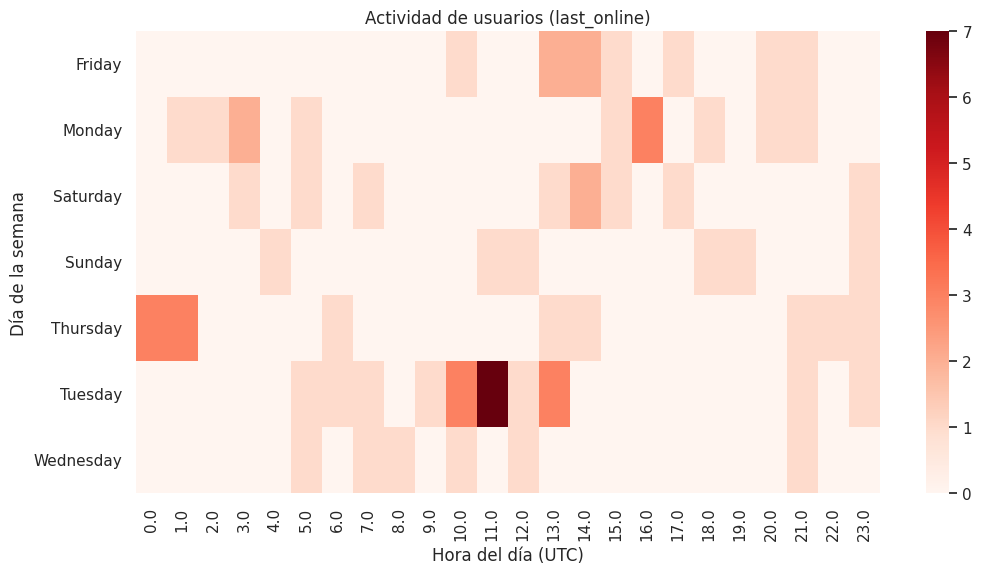

In [63]:
#Mapa de horas
users["hour"] = users["last_online"].dt.hour
users["weekday"] = users["last_online"].dt.day_name()
pivot = users.pivot_table(
    index="weekday",
    columns="hour",
    values="id",
    aggfunc="count",
    fill_value=0
)
sns.heatmap(pivot, cmap="Reds")
plt.title("Actividad de usuarios (last_online)")
plt.xlabel("Hora del día (UTC)")
plt.ylabel("Día de la semana")
plt.show()


In [74]:
#ultimos de filipinas...
eak_date = pd.to_datetime("2025-04-29")
active_29 = users[
    users["last_online"].dt.date == leak_date.date()
].sort_values("last_online")

active_29.sort_values("last_online", ascending=False)[["id", "login", "is_admin", "last_online"]]



,id,login,is_admin,last_online
68,70,Swan,0,2025-04-29 13:23:24
31,32,Boston,0,2025-04-29 13:18:08
0,1,admin,1,2025-04-29 12:46:02
27,28,umarbishop47,0,2025-04-29 11:49:13
72,74,hastalamuerte18,0,2025-04-29 11:41:20
1,2,matrix777,0,2025-04-29 11:29:42
63,65,Iofikdis,0,2025-04-29 11:17:03
11,12,PiotrBond,0,2025-04-29 11:09:36
53,54,affiliate900,0,2025-04-29 10:28:30
69,71,AarronBarker,0,2025-04-29 10:05:49


## Chats


In [77]:
import pandas as pd

chats = pd.read_csv("chats.csv")
chats.head()


,id,advid_owner,advid,clientid,flag,date,content,is_file,real_filename,filename,readed,created_at,updated_at,readed_at
0,66,10,10,24,0,1734583524,You can attach a few files for test decryption...,0,NaN,NaN,1,2024-12-19 04:45:24,NaN,2024-12-19 05:39:24
1,67,10,10,24,0,1734586509,NaN,1,realchristmasglobe.zip,d43a1040c42f6770eec90c31a3fb88bf6763b08d1b313.zip,1,2024-12-19 05:35:09,NaN,2024-12-19 05:39:24
2,68,10,10,24,0,1734586852,how much decrypt file\n,0,NaN,NaN,1,2024-12-19 05:40:52,NaN,2024-12-19 05:40:59
3,69,10,10,24,1,1734586873,4000$\nwe accept bitcoin only,0,NaN,NaN,1,2024-12-19 05:41:13,NaN,2024-12-19 05:41:43
4,70,10,10,24,1,1734586924,realchristmasglobe.zip\nnot a correct file\nse...,0,NaN,NaN,1,2024-12-19 05:42:04,NaN,2024-12-19 05:43:08


In [78]:
chats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423 entries, 0 to 4422
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4423 non-null   int64 
 1   advid_owner    4423 non-null   int64 
 2   advid          4423 non-null   int64 
 3   clientid       4423 non-null   int64 
 4   flag           4423 non-null   int64 
 5   date           4423 non-null   int64 
 6   content        4235 non-null   object
 7   is_file        4423 non-null   int64 
 8   real_filename  188 non-null    object
 9   filename       188 non-null    object
 10  readed         4423 non-null   int64 
 11  created_at     4423 non-null   object
 12  updated_at     1 non-null      object
 13  readed_at      4334 non-null   object
dtypes: int64(8), object(6)
memory usage: 483.9+ KB


In [89]:
# Cargar chats y merge
chats = pd.read_csv("chats.csv")
chats_users = chats.merge(
    users[["id", "login", "is_admin"]],
    left_on="advid_owner",
    right_on="id",
    how="left"
)

chats_users[["advid_owner", "login"]]


,advid_owner,login
0,10,Brown
1,10,Brown
2,10,Brown
3,10,Brown
4,10,Brown
...,...,...
4418,70,Swan
4419,70,Swan
4420,70,Swan
4421,70,Swan


In [90]:
top_affiliates = (
    chats_users
    .groupby(["advid_owner", "login"])["id_x"]  # id_x = id del chat
    .count()
    .reset_index(name="message_count")
    .sort_values("message_count", ascending=False)
    .head(10)
)

top_affiliates


,advid_owner,login,message_count
9,25,Christopher,2078
30,65,Iofikdis,470
33,70,Swan,357
2,12,PiotrBond,290
19,43,JamesCraig,290
11,28,umarbishop47,134
32,69,BaleyBeach,102
17,37,king457533579,81
1,10,Brown,80
16,36,59X67,66


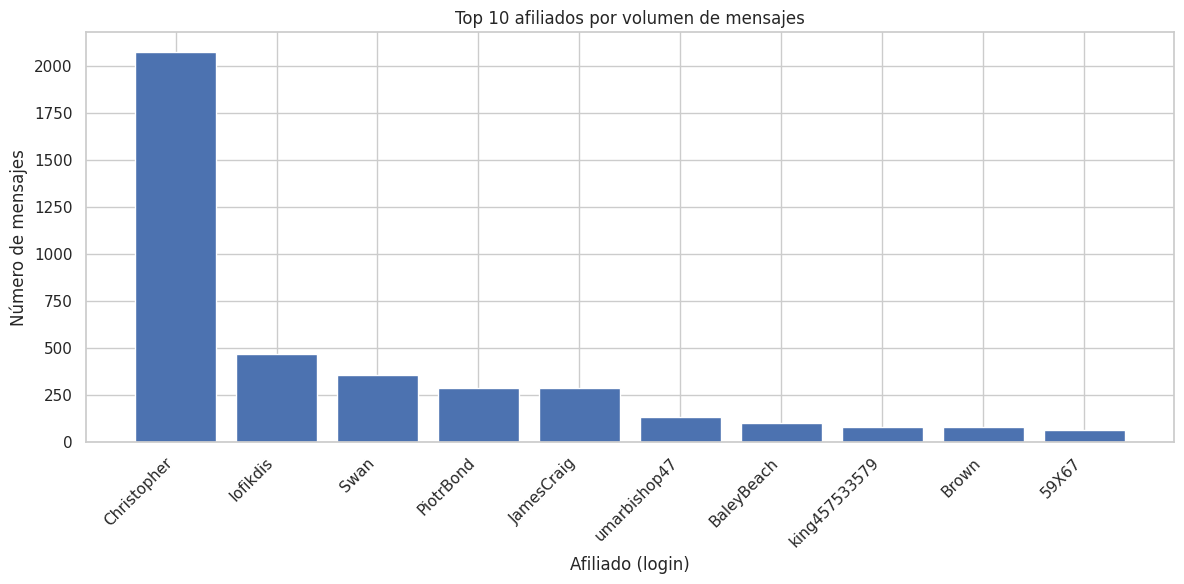

In [91]:
plt.figure(figsize=(12,6))

plt.bar(
    top_affiliates["login"],
    top_affiliates["message_count"]
)

plt.title("Top 10 afiliados por volumen de mensajes")
plt.xlabel("Afiliado (login)")
plt.ylabel("Número de mensajes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [105]:
AFFILIATE_ID = 25 #moddddd

affiliate_chats = chats[
    chats["advid_owner"] == AFFILIATE_ID
].copy()

affiliate_chats.shape


(2078, 14)

In [106]:

affiliate_chats["created_at"] = pd.to_datetime(
    affiliate_chats["created_at"],
    errors="coerce"
)


In [107]:
affiliate_chats["created_at"].agg(["min", "max"])


min   2024-12-20 18:49:54
max   2025-04-26 13:18:32
Name: created_at, dtype: datetime64[ns]

In [108]:
affiliate_chats["hour"] = affiliate_chats["created_at"].dt.hour
#contarpor hora
hourly_activity = (
    affiliate_chats
    .groupby("hour")["id"]
    .count()
    .sort_index()
)

hourly_activity


hour
0       5
1      14
2      29
3      26
4      33
5      20
6      62
7     118
8      72
9     136
10    132
11    245
12    127
13    287
14    252
15    170
16    189
17     64
18     18
19     43
20     17
21      5
22      5
23      9
Name: id, dtype: int64

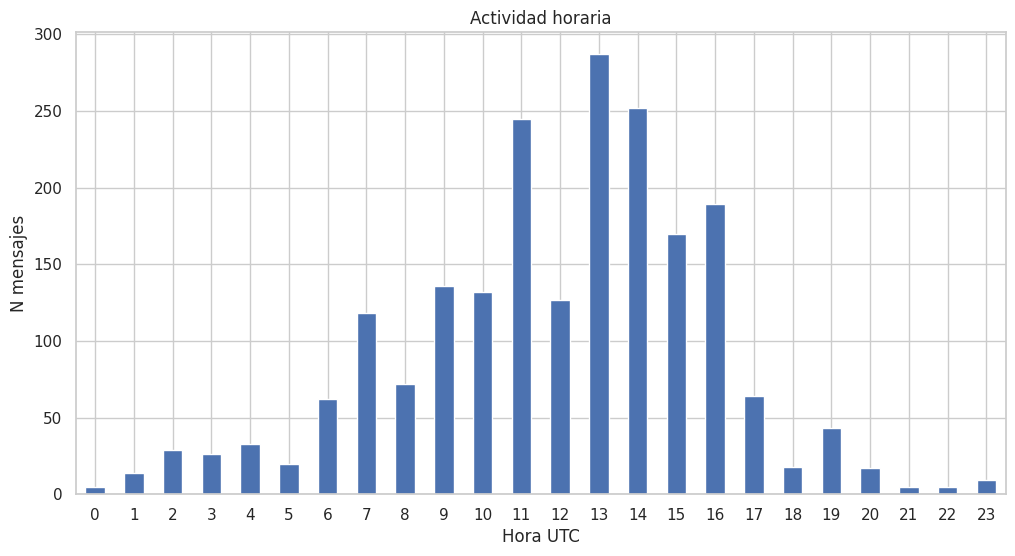

In [112]:
hourly_activity.plot(kind="bar")
plt.title("Actividad horaria")
plt.xlabel("Hora UTC")
plt.ylabel("N mensajes")
plt.xticks(rotation=0)
plt.show()


In [113]:
clients_activity = (
    affiliate_chats
    .groupby("clientid")["id"]
    .count()
    .sort_values(ascending=False)
)

clients_activity.head(10)


clientid
182    453
266    338
138    312
158    267
154    144
167    138
235     64
36      56
212     45
258     34
Name: id, dtype: int64